# House Prices Prediction using Linear Regression

By: Pratik Suchak

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## Import the libraries


In [1]:
import json
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

pd.pandas.set_option("display.max_columns", None)

## Load the dataset


In [2]:
train_df = pd.read_csv("/Users/pratiksuchak/Downloads/X_train.csv")


In [3]:
test_df = pd.read_csv("/Users/pratiksuchak/Downloads/X_test.csv")
print(f"Number of Rows: {test_df.shape[0]}\nNumber of Columns: {test_df.shape[1]}")

Number of Rows: 1459
Number of Columns: 83


In [4]:
train_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,2.505338,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.036765,0.098361,1.0,1.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,0.125089,1.0,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,1.0,0.0,0.0,0.0
1,2,2.493950,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,0.227941,0.524590,1.0,1.0,0.8,0.9,1.000000,0.00000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,0.173281,1.0,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,1.0,0.0,0.0,0.0
2,3,2.510994,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.051471,0.114754,1.0,1.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,0.086109,1.0,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,1.0,0.0,0.0,0.0
3,4,2.472277,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,0.669118,0.606557,1.0,1.0,0.7,0.4,1.000000,0.00000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,0.038271,1.0,0.0,0.231164,0.123732,1.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.5,0.0,0.0,0.0
4,5,2.520050,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,0.058824,0.147541,1.0,1.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,0.116052,1.0,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,1.0,0.0,0.0,0.0


## Exploratory Data Analysis


### Missing Values


In [5]:
null_features = [col for col in train_df.columns if train_df[col].isnull().any()]
for feature in null_features:
    missing_percentage = train_df[feature].isnull().mean() * 100
    print(f"Percentage of missing values for {feature}: {missing_percentage}%")


#### Relationship between missing values and Sale Price

In [6]:
for feature in null_features:
    df_copy = train_df.copy()
    df_copy[feature] = np.where(df_copy[feature].isnull(), 1, 0)
    df_copy.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.xlabel("Null Status")
    plt.ylabel("Median Sale Price")
    plt.show()

The relation between missing values and the dependent variable is clearly visible. So we need to replace the missing values with something meaningful


### Numerical Variables / Features


In [7]:
numerical_features = [col for col in train_df.columns if train_df[col].dtypes in [np.int64, np.float64]]
print(f"Number of numerical variables/features: {len(numerical_features)}")

Number of numerical variables/features: 84


In [8]:
train_df[numerical_features].head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,2.505338,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.036765,0.098361,1.0,1.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,0.125089,1.0,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,1.0,0.0,0.0,0.0
1,2,2.493950,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,0.227941,0.524590,1.0,1.0,0.8,0.9,1.000000,0.00000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,0.173281,1.0,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,1.0,0.0,0.0,0.0
2,3,2.510994,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.051471,0.114754,1.0,1.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,0.086109,1.0,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,1.0,0.0,0.0,0.0
3,4,2.472277,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,0.669118,0.606557,1.0,1.0,0.7,0.4,1.000000,0.00000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,0.038271,1.0,0.0,0.231164,0.123732,1.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.5,0.0,0.0,0.0
4,5,2.520050,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,0.058824,0.147541,1.0,1.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,0.116052,1.0,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,1.0,0.0,0.0,0.0


### Temporal Variables / Features


In [9]:
temporal_features = [feature for feature in numerical_features if any(keyword in feature.lower() for keyword in ["yr", "year"])]
print(f"Number of temporal variables/features: {len(temporal_features)}")

Number of temporal variables/features: 5


In [10]:
train_df[temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,GarageYrBlt_isnull
0,0.036765,0.098361,0.046729,0.50,0.0
1,0.227941,0.524590,0.289720,0.25,0.0
2,0.051471,0.114754,0.065421,0.50,0.0
3,0.669118,0.606557,0.074766,0.00,0.0
4,0.058824,0.147541,0.074766,0.50,0.0


Let's find the relation between Year Sold and Sale Price


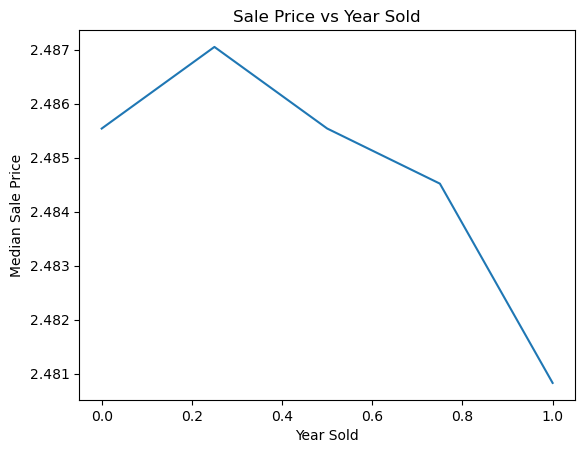

In [11]:
train_df.groupby("YrSold")["SalePrice"].median().plot()
plt.title("Sale Price vs Year Sold")
plt.xlabel("Year Sold")
plt.ylabel("Median Sale Price")
plt.show()

#### Relationship of the difference between Year Sold and temporal features with Sale Price


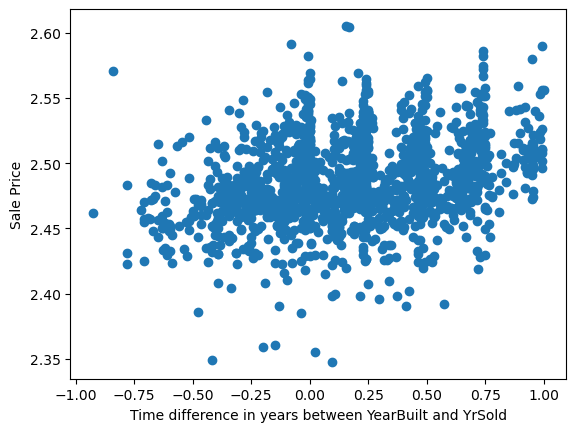

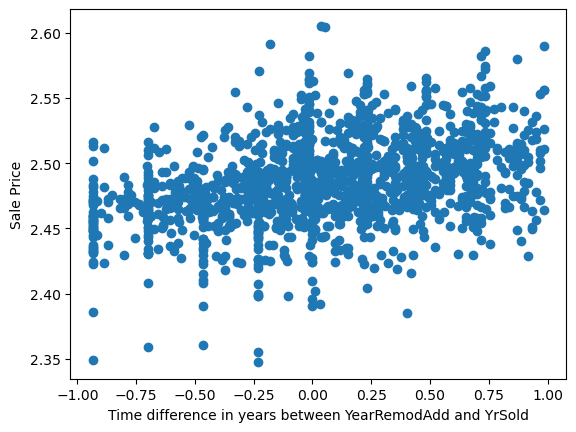

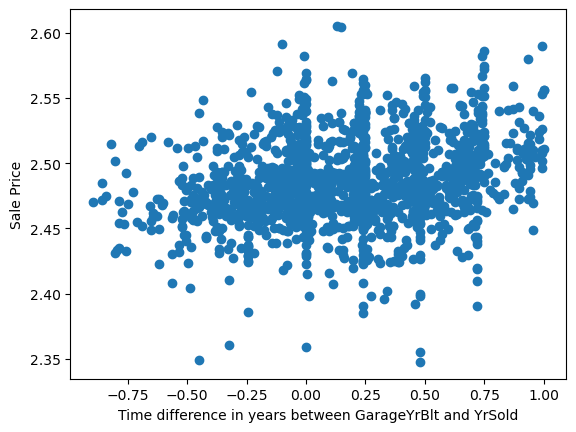

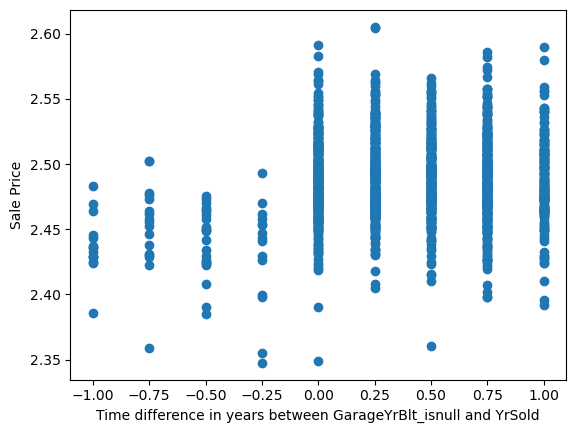

In [12]:
for feature in temporal_features:
    if feature != "YrSold":
        df_copy = train_df.copy()
        df_copy[feature] = df_copy["YrSold"] - df_copy[feature]
        plt.scatter(df_copy[feature], df_copy["SalePrice"])
        plt.xlabel(f"Time difference in years between {feature} and YrSold")
        plt.ylabel("Sale Price")
        plt.show()

### Discrete Variables / Features


In [13]:
discrete_features = [feature for feature in numerical_features if len(train_df[feature].unique()) < 25 and feature not in temporal_features + ["Id"]]
print(f"Number of discrete variables/features: {len(discrete_features)}")

Number of discrete variables/features: 62


In [14]:
train_df[discrete_features].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull
0,0.235294,1.0,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,1.0,1.0,1.0,1.0,1.0,0.0,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.666667,0.50,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,1.0,1.0,0.0,0.0
1,0.000000,1.0,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,1.0,1.0,0.8,0.9,1.000000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,0.666667,0.50,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,1.0,1.0,0.0,0.0
2,0.235294,1.0,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,1.0,1.0,1.0,1.0,1.0,0.0,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.666667,0.50,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,1.0,1.0,0.0,0.0
3,0.294118,1.0,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,1.0,1.0,0.7,0.4,1.000000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,1.0,1.0,0.5,1.0,1.0,0.0,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,1.000000,0.75,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,1.0,0.5,0.0,0.0
4,0.235294,1.0,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,1.0,1.0,1.0,1.0,0.666667,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,1.0,1.0,1.0,1.0,1.0,0.0,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.666667,0.75,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.0


#### Relationship between discrete features and Sale Price


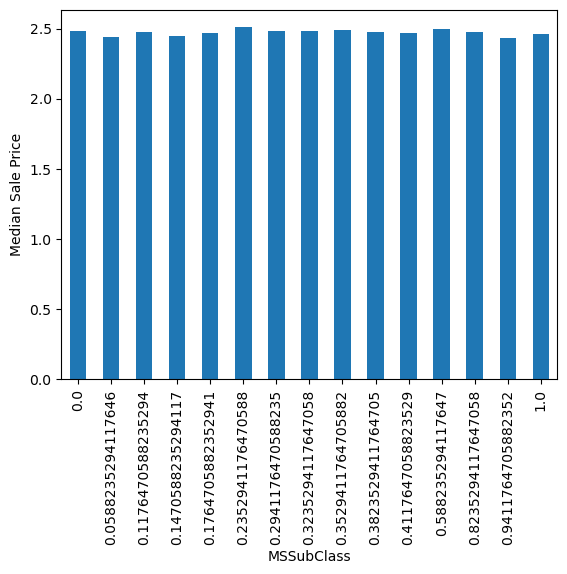

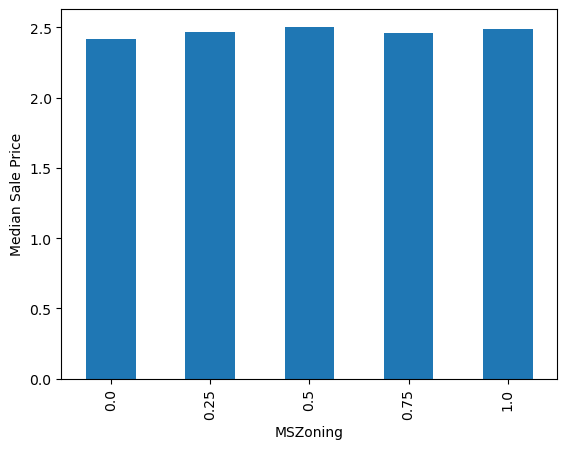

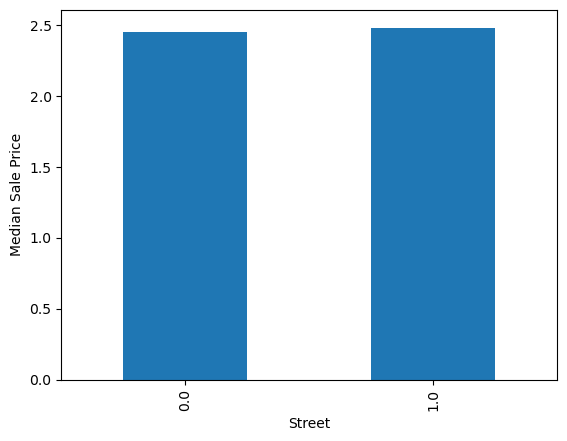

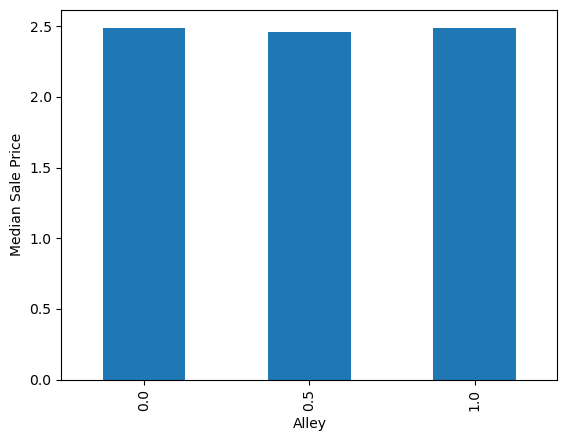

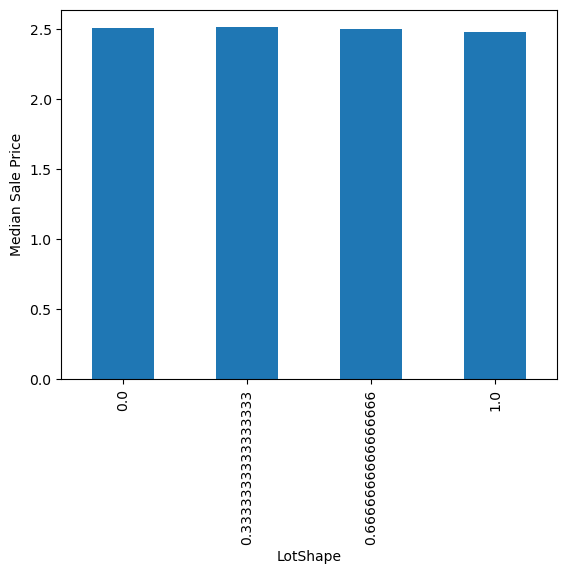

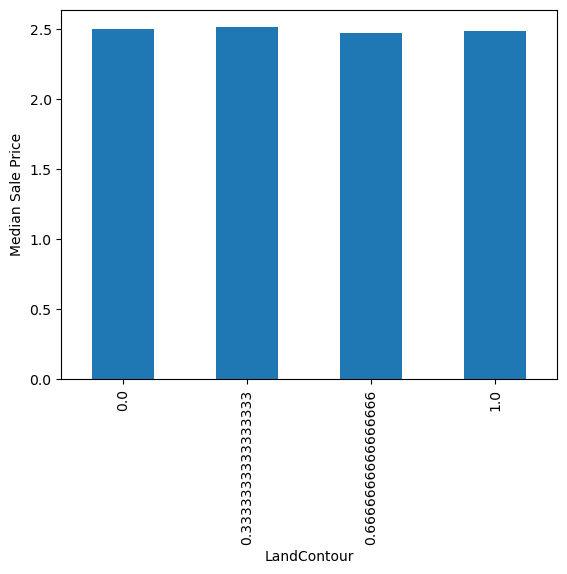

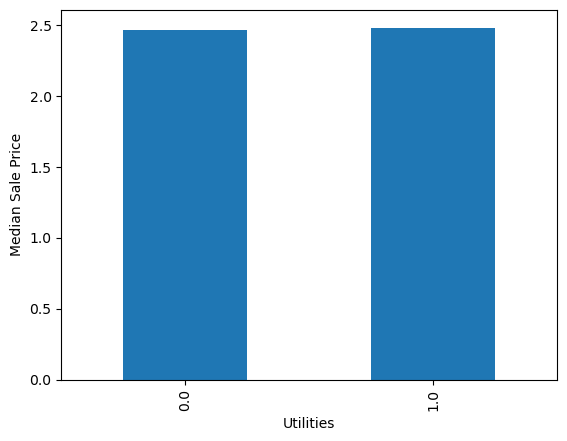

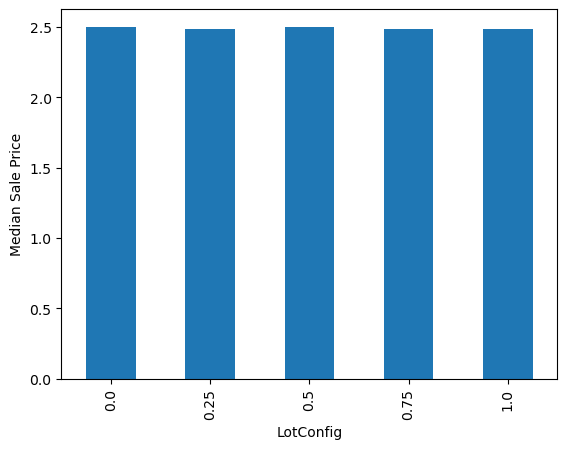

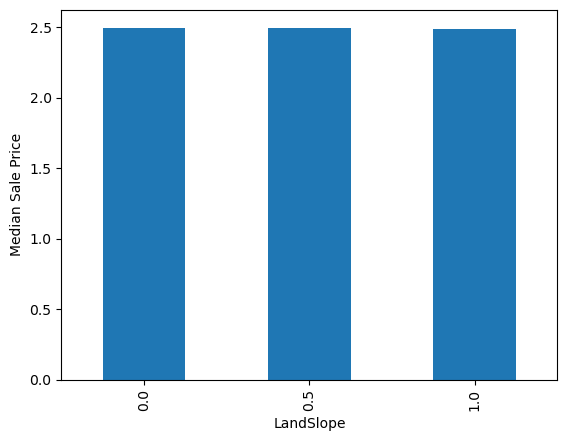

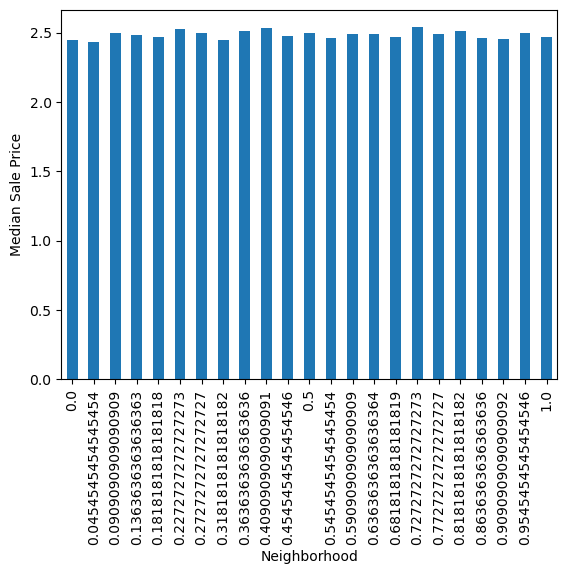

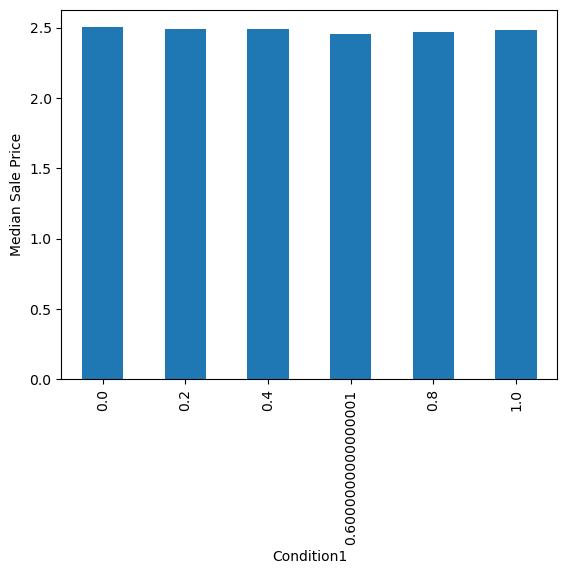

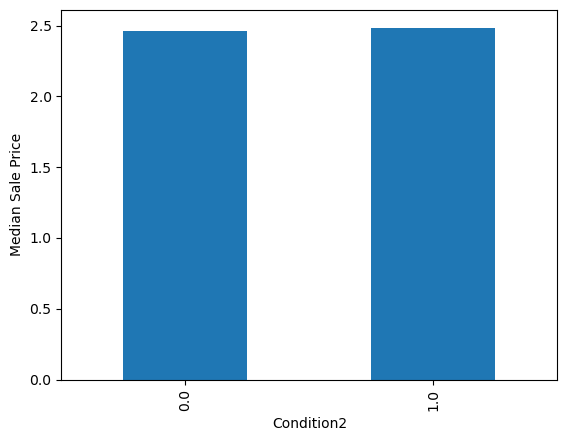

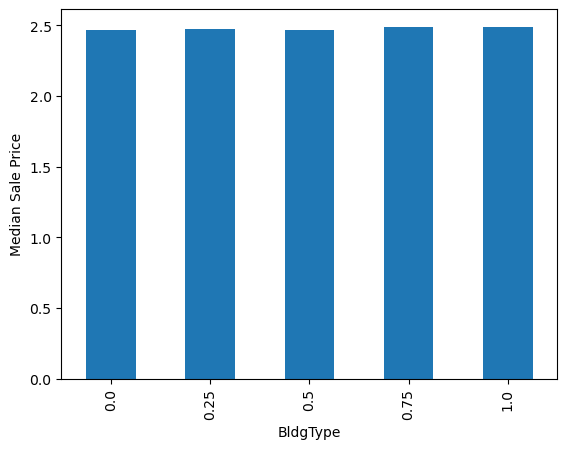

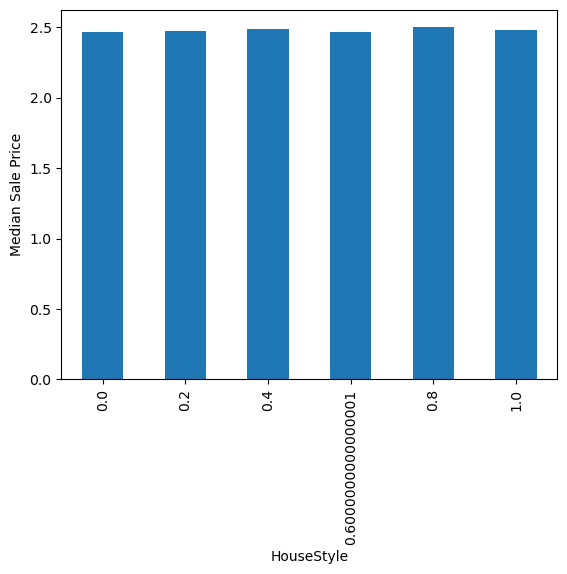

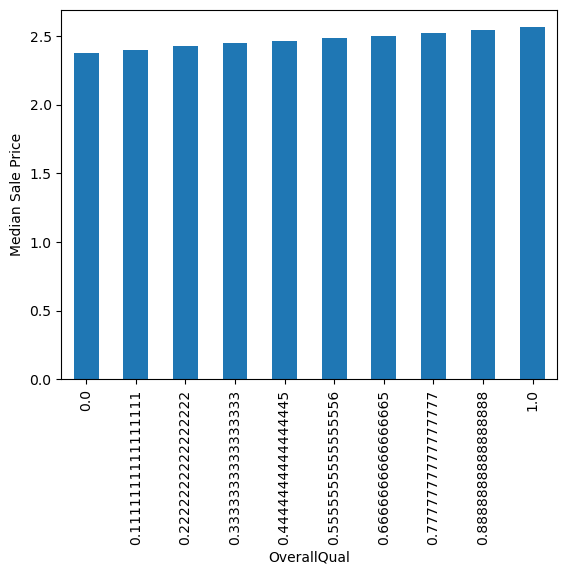

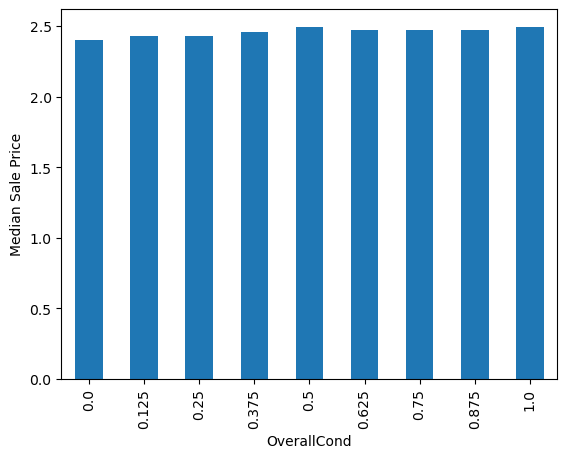

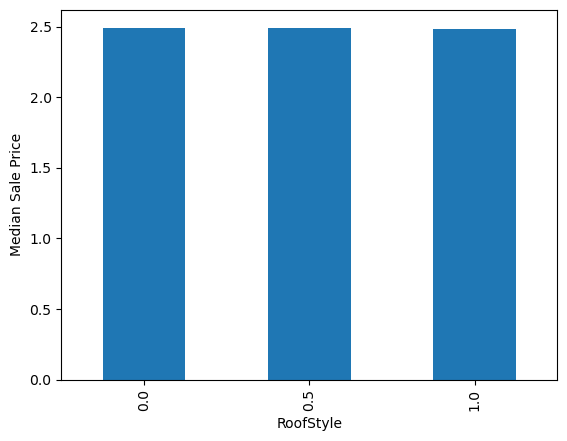

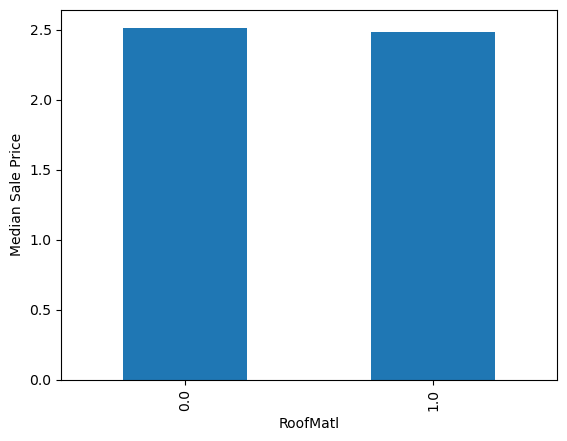

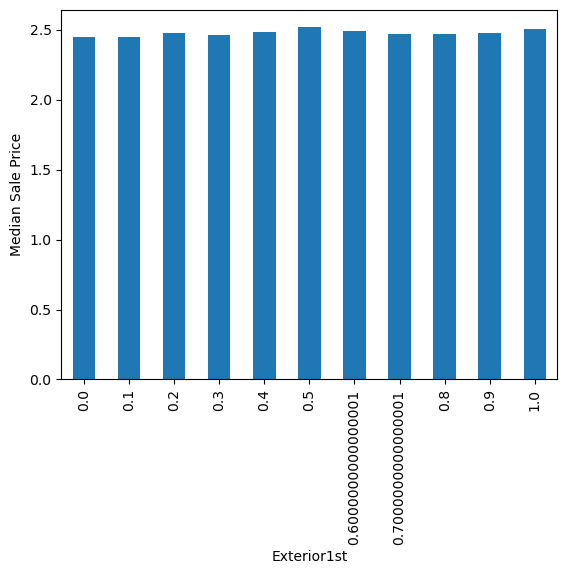

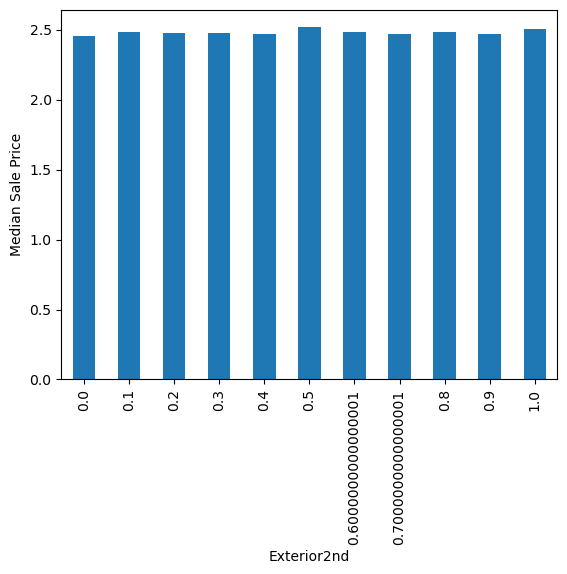

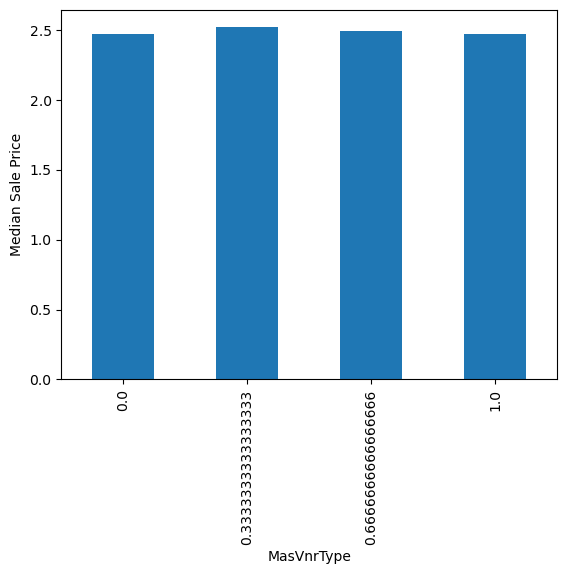

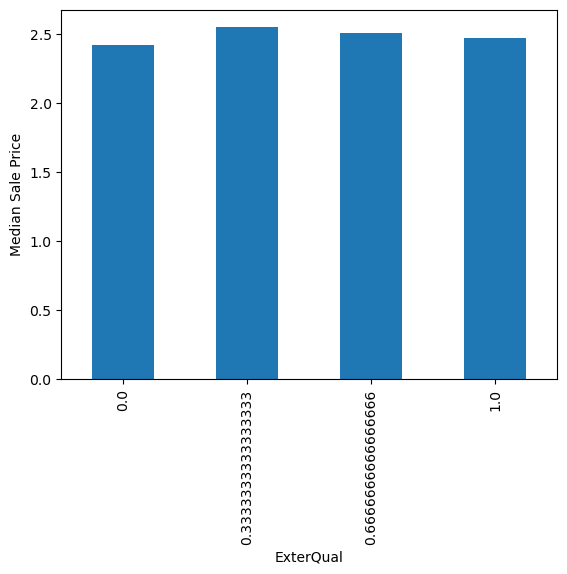

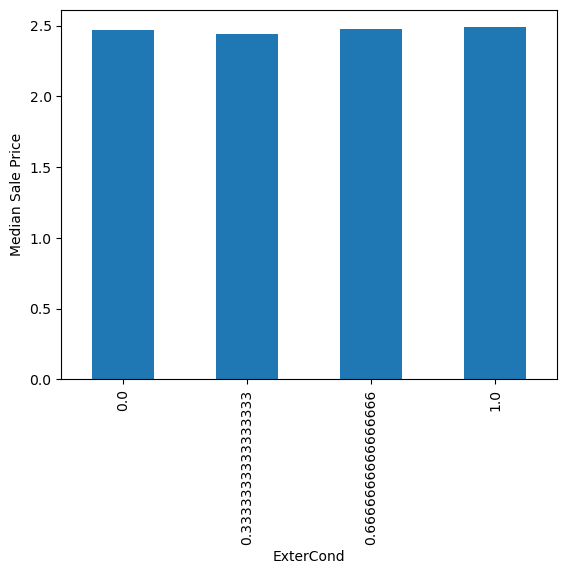

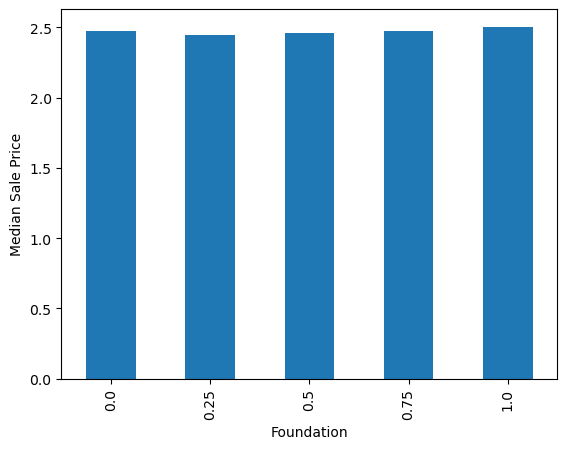

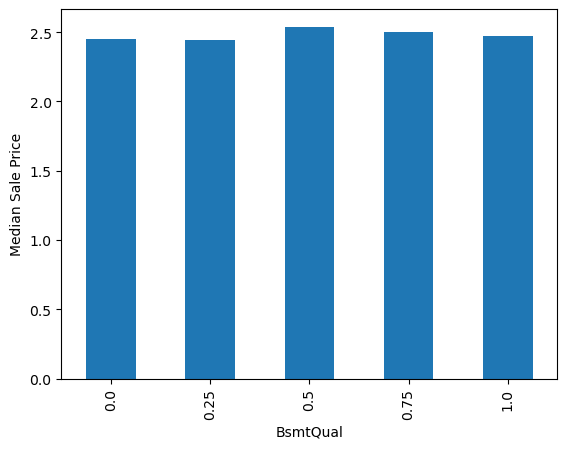

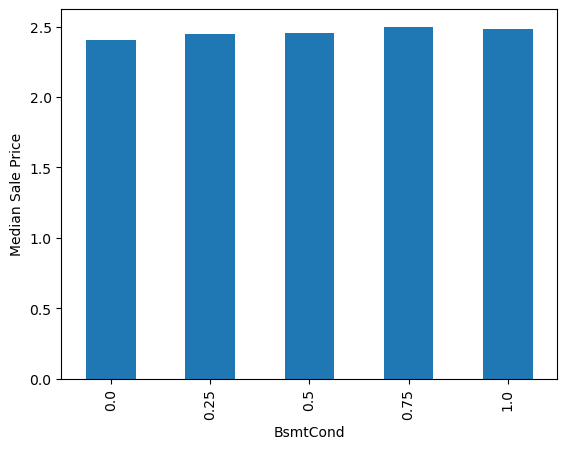

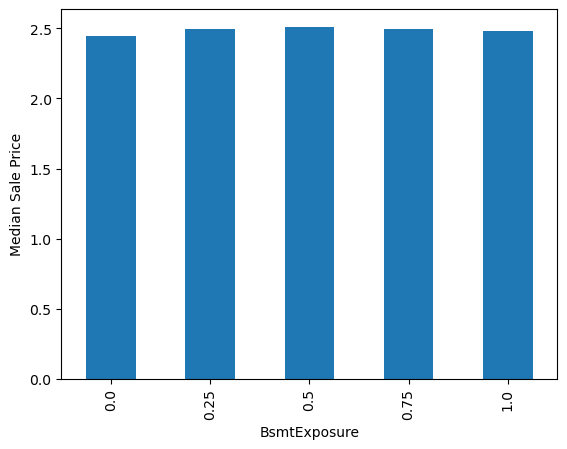

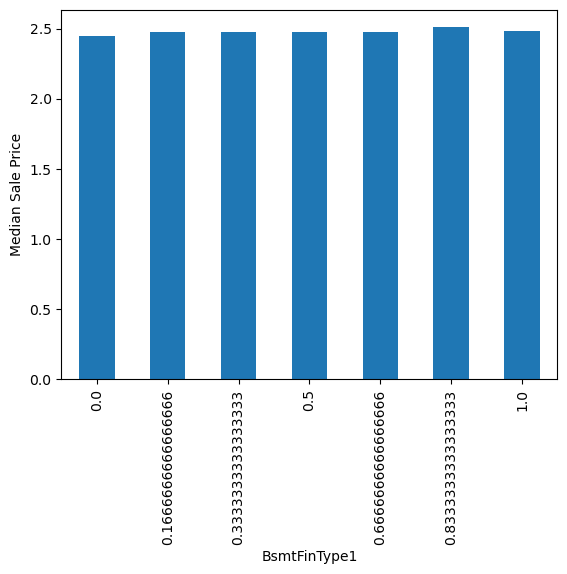

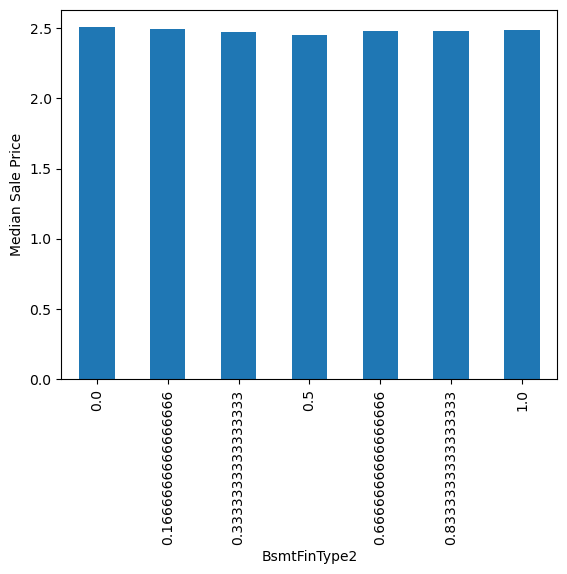

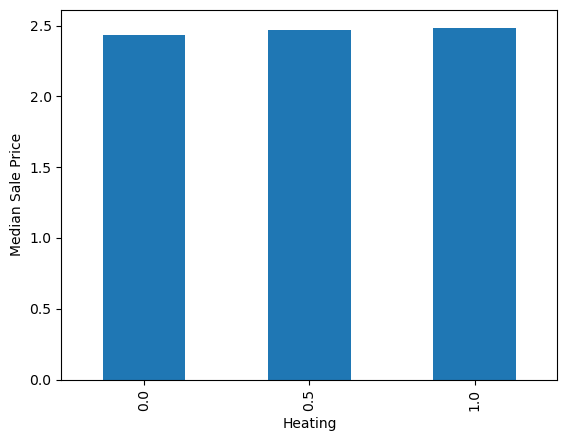

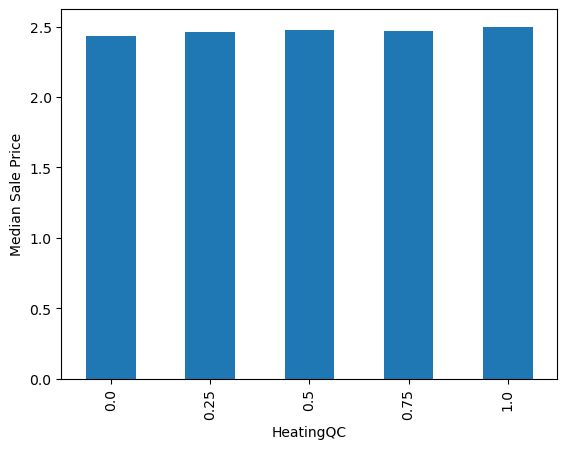

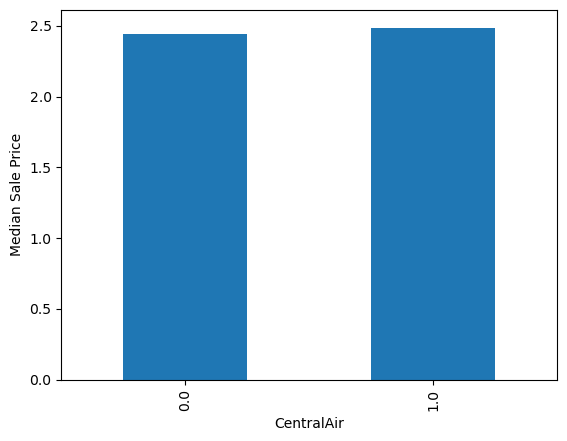

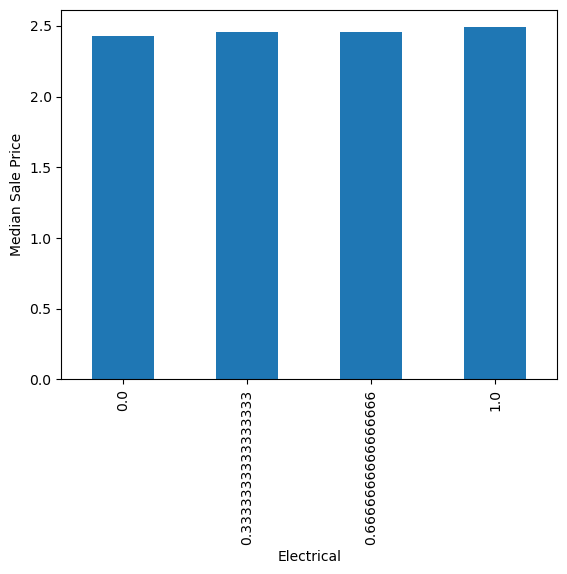

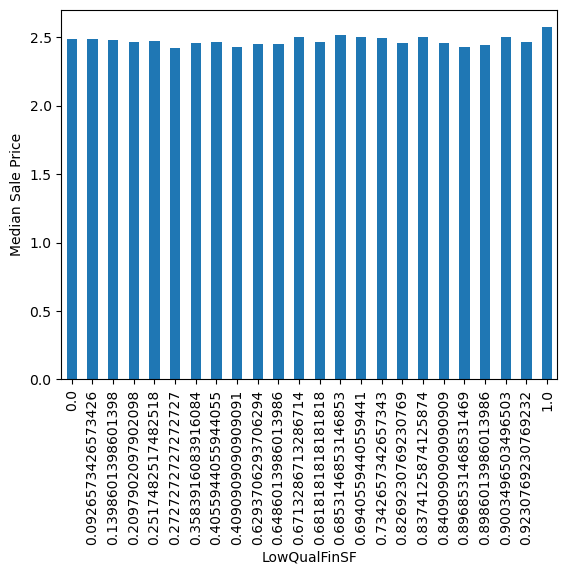

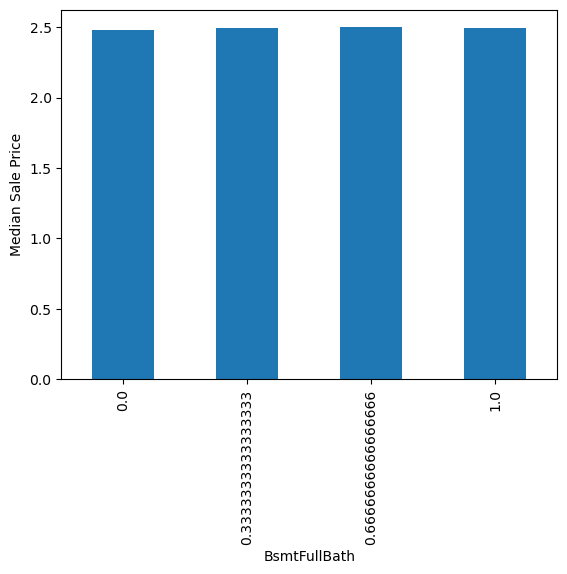

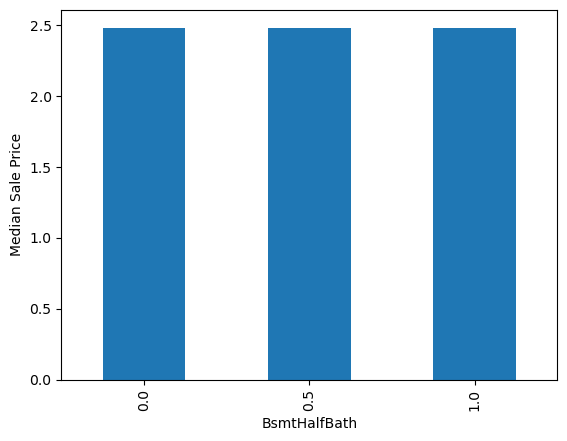

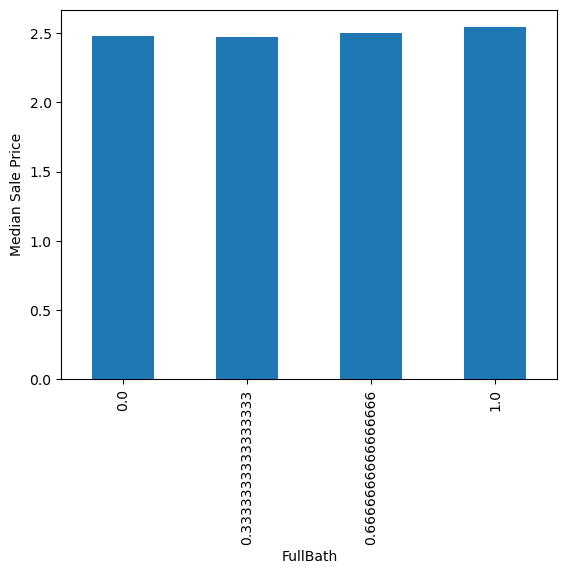

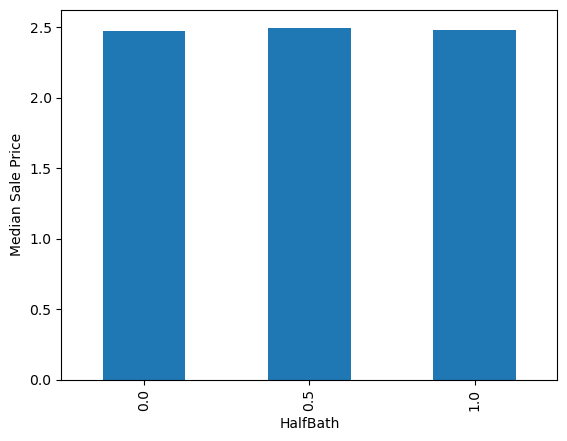

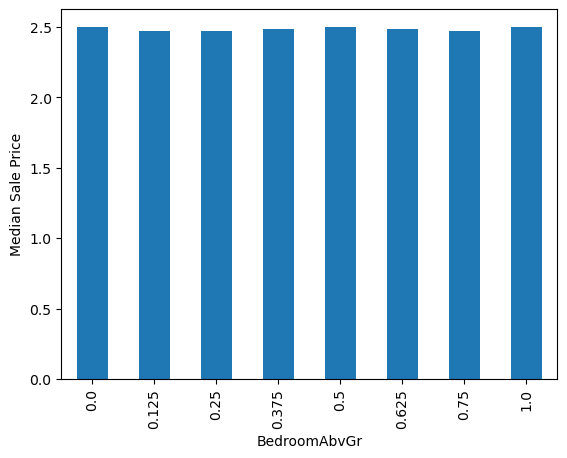

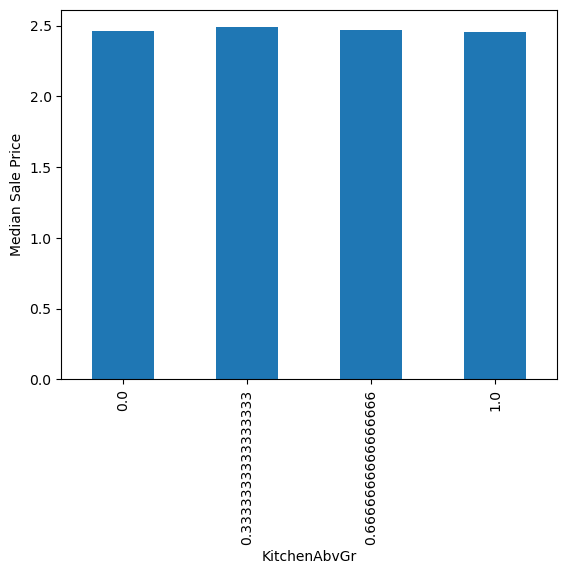

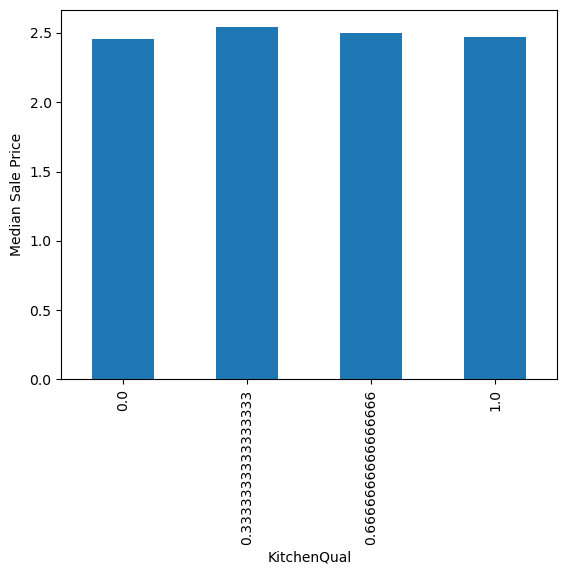

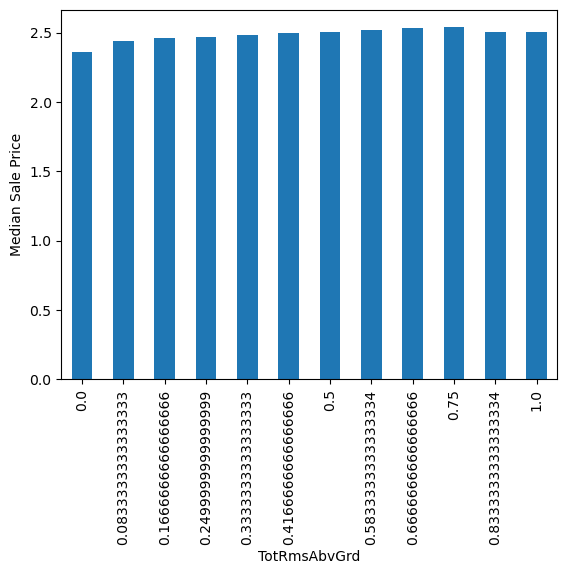

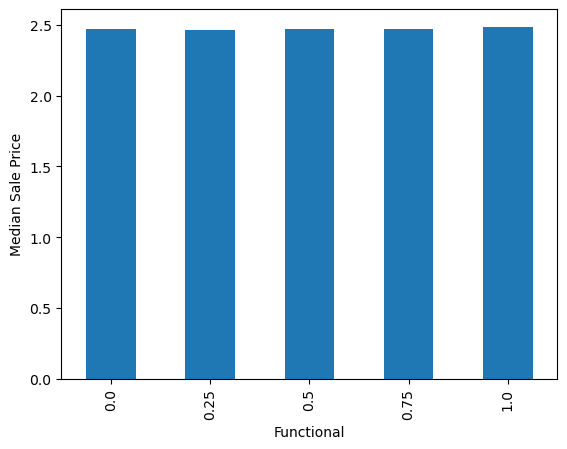

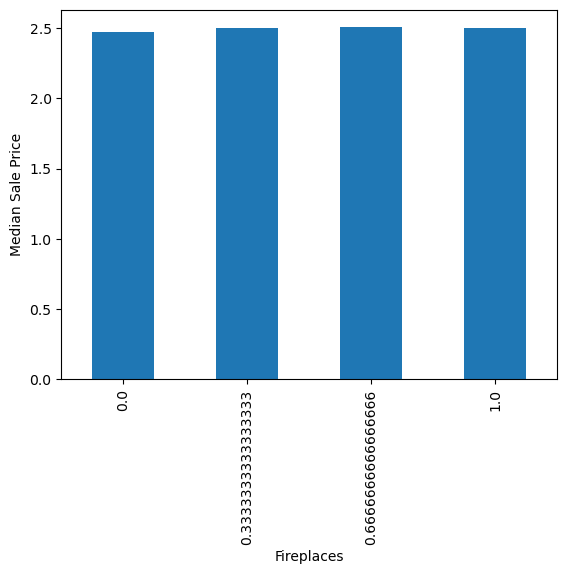

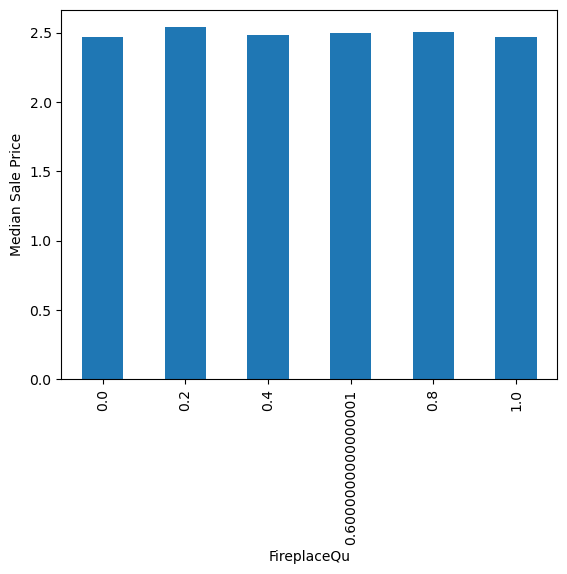

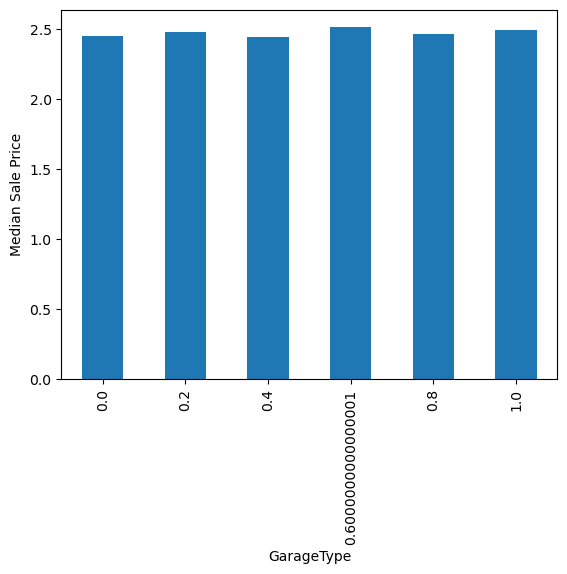

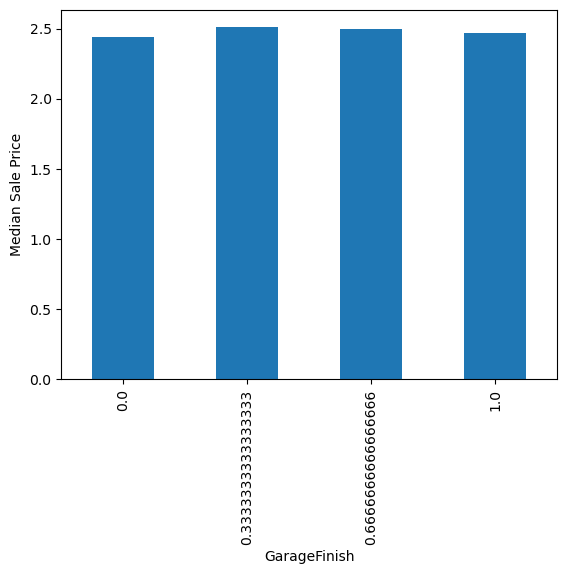

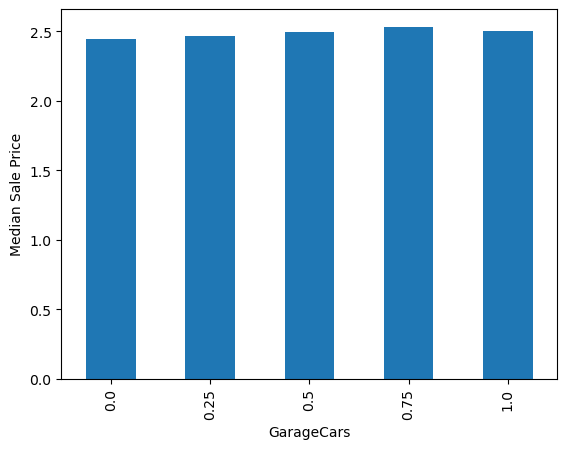

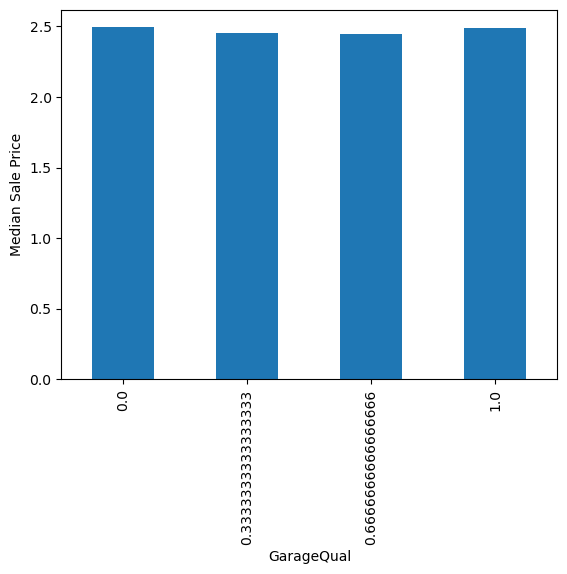

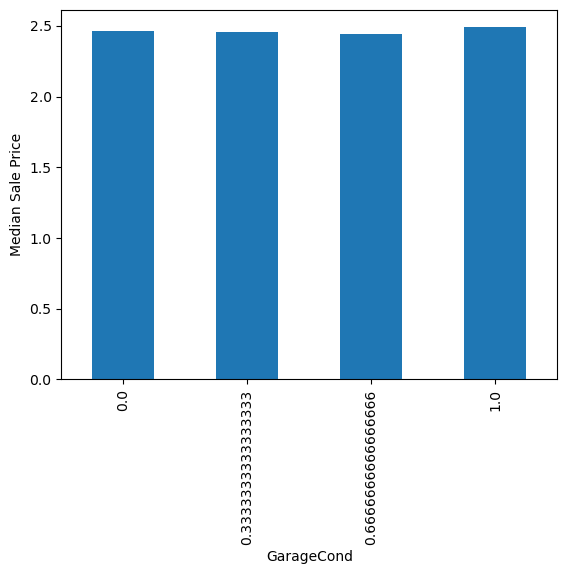

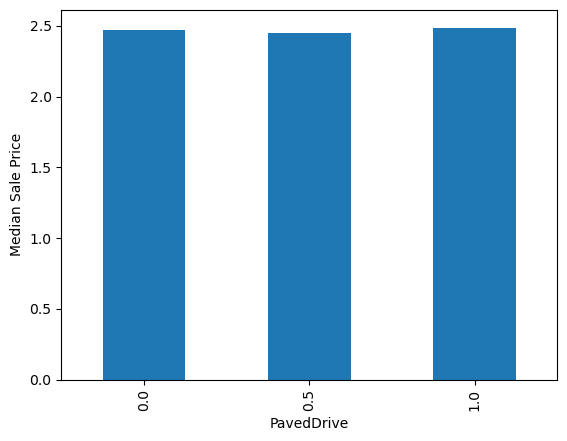

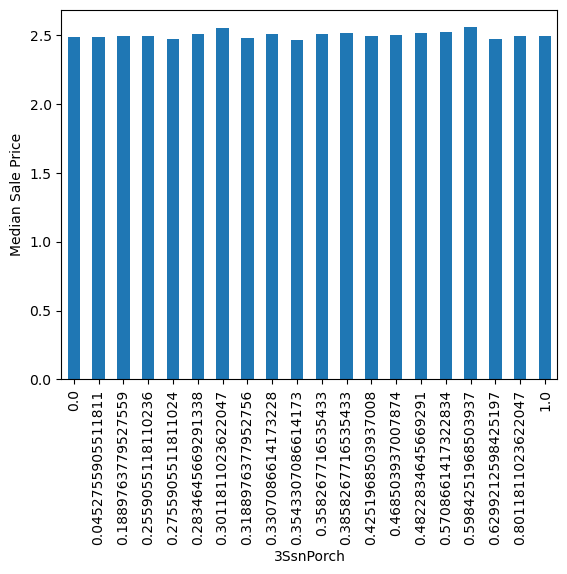

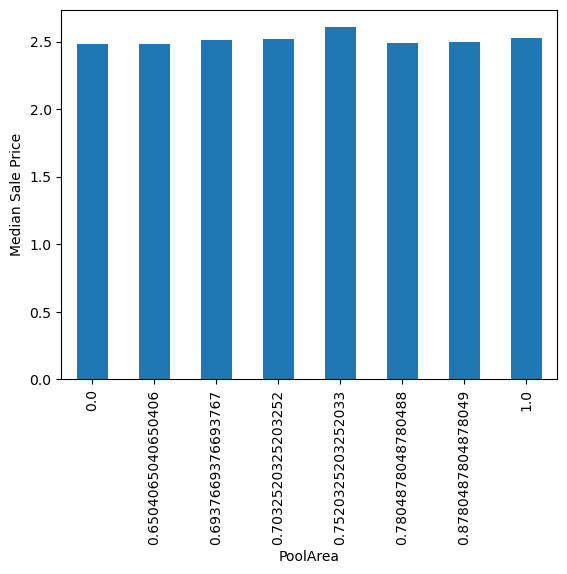

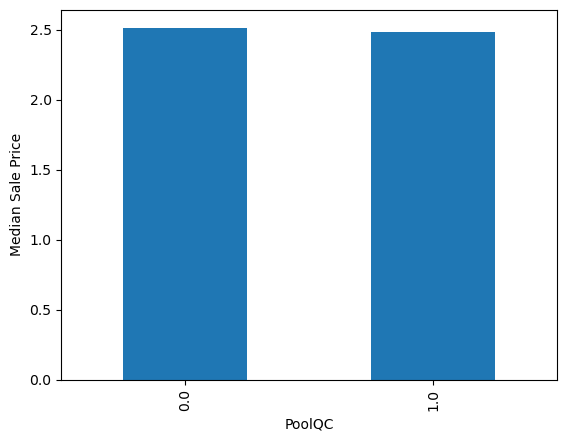

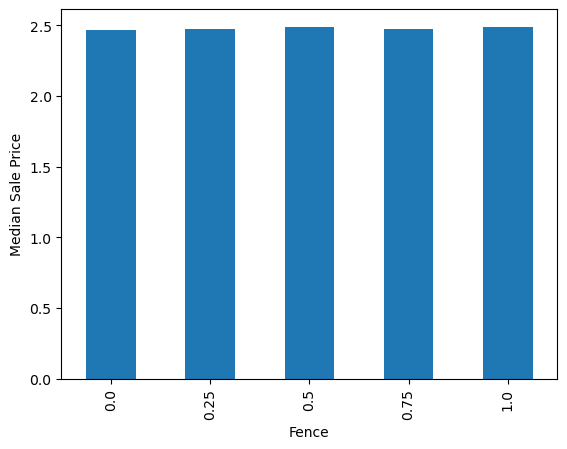

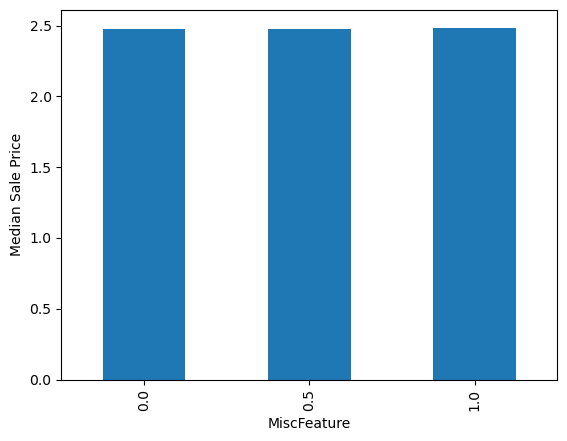

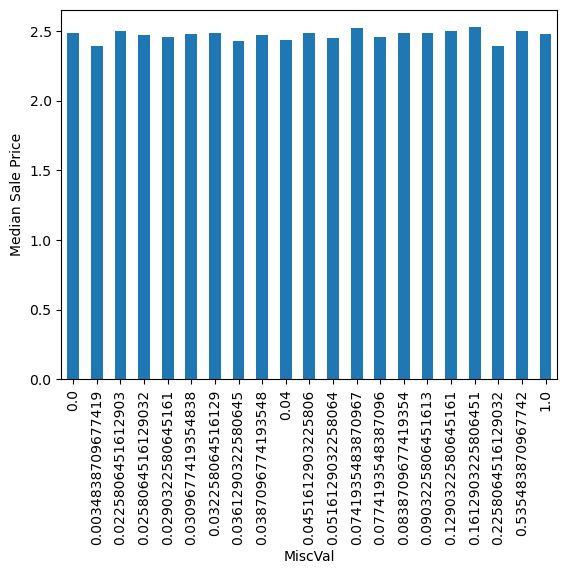

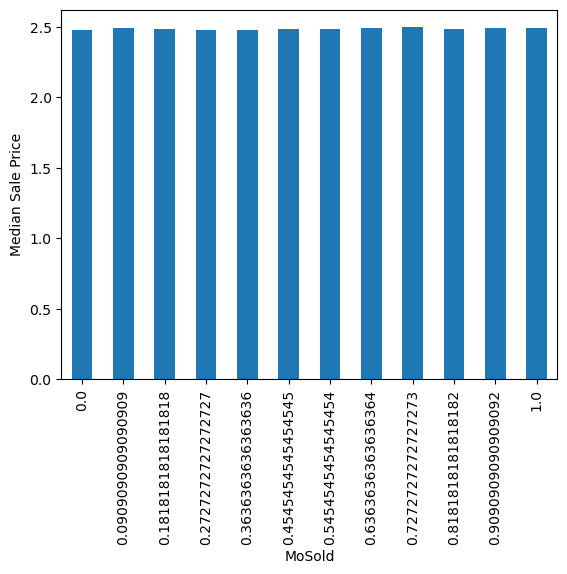

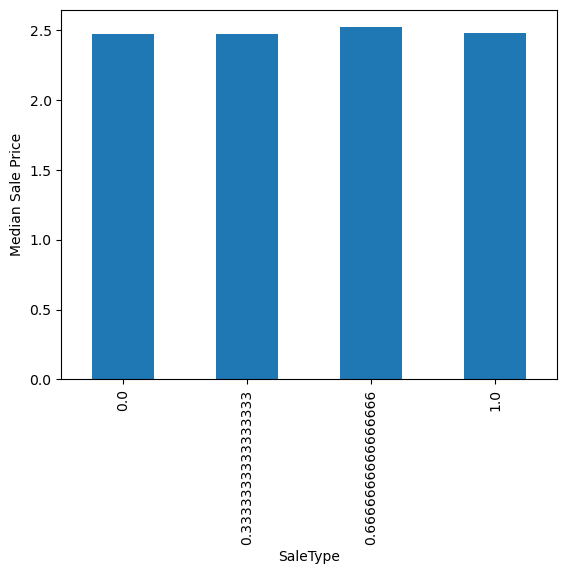

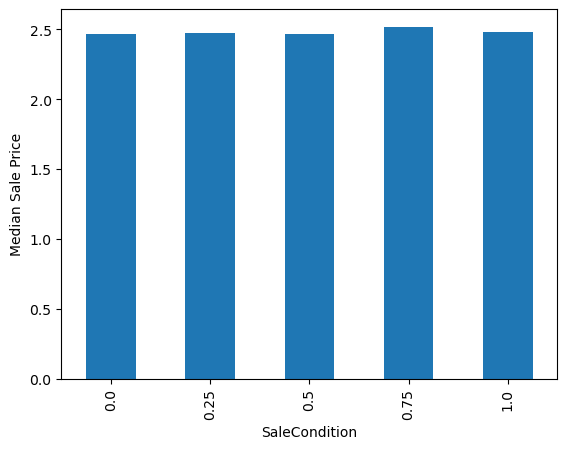

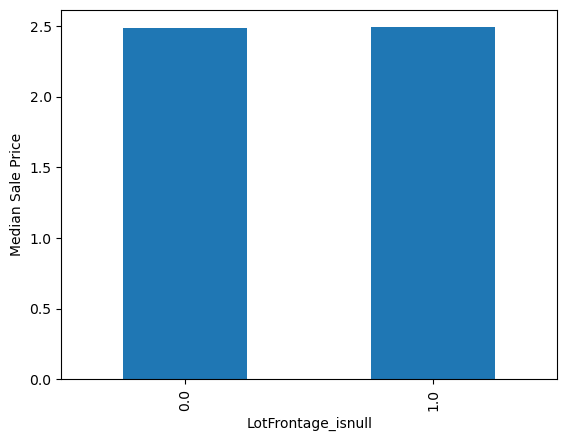

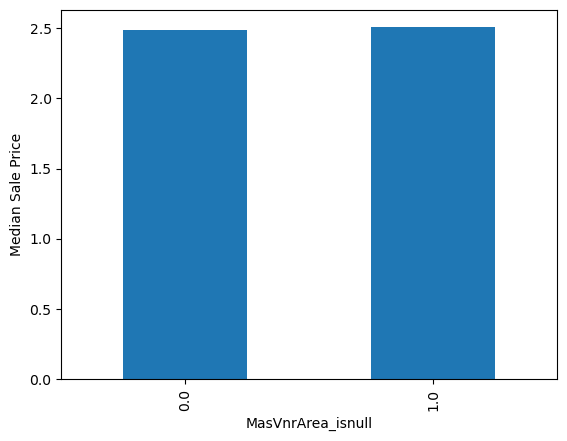

In [15]:
for feature in discrete_features:
    df_copy = train_df.copy()
    df_copy.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Median Sale Price")
    plt.show()

### Continuous Variables / Features


In [16]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + temporal_features + ["Id"]]
print(f"Number of continuous variables/features: {len(continuous_features)}")

Number of continuous variables/features: 16


In [17]:
train_df[continuous_features].head()

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,2.505338,0.418208,0.366344,0.12250,0.125089,0.0,0.064212,0.140098,0.356155,0.413559,0.577712,0.386460,0.000000,0.111517,0.000000,0.0
1,2.493950,0.495064,0.391317,0.00000,0.173281,0.0,0.121575,0.206547,0.503056,0.000000,0.470245,0.324401,0.347725,0.000000,0.000000,0.0
2,2.510994,0.434909,0.422359,0.10125,0.086109,0.0,0.185788,0.150573,0.383441,0.419370,0.593095,0.428773,0.000000,0.076782,0.000000,0.0
3,2.472277,0.388581,0.390295,0.00000,0.038271,0.0,0.231164,0.123732,0.399941,0.366102,0.579157,0.452750,0.000000,0.063985,0.492754,0.0
4,2.520050,0.513123,0.468761,0.21875,0.116052,0.0,0.209760,0.187398,0.466237,0.509927,0.666523,0.589563,0.224037,0.153565,0.000000,0.0


#### Analysing the continuous features by plotting histograms to understand the distribution


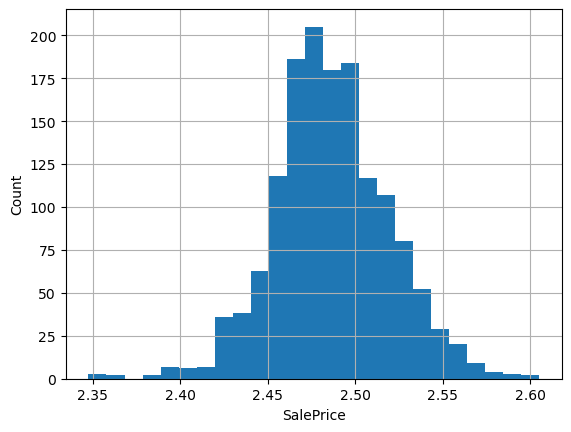

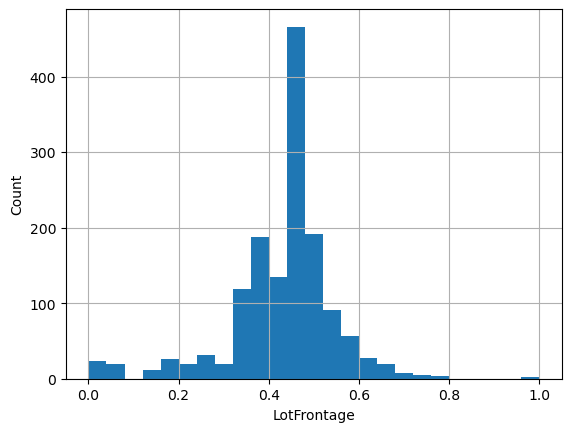

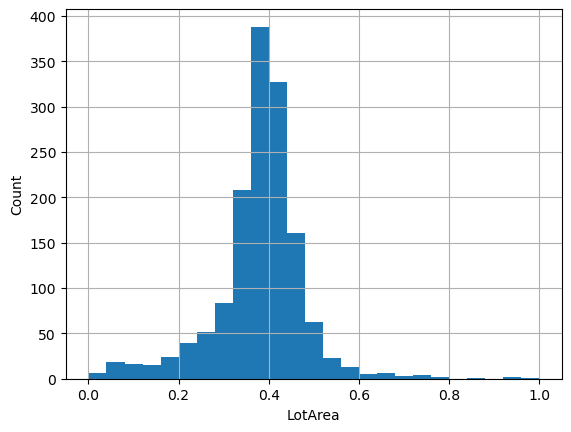

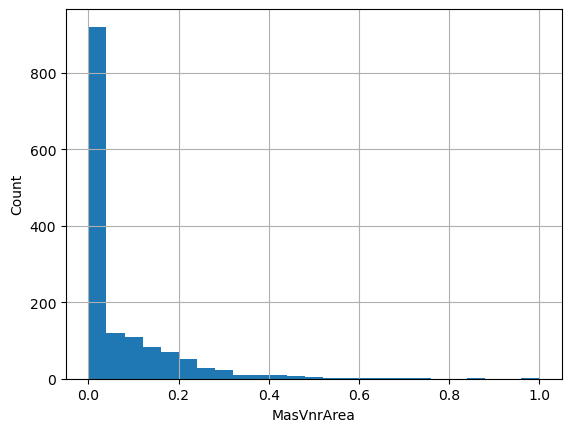

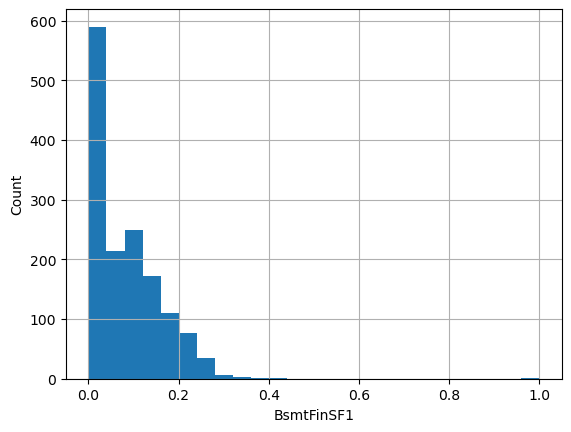

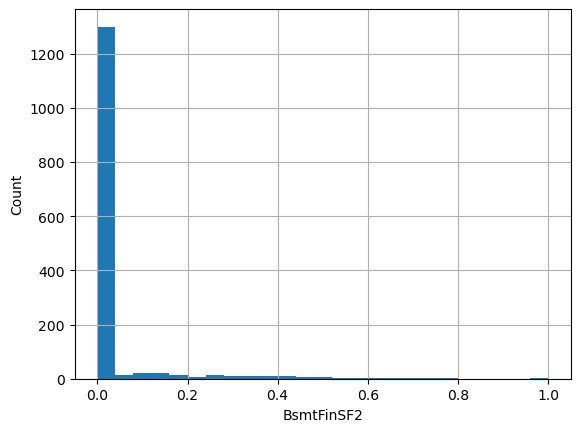

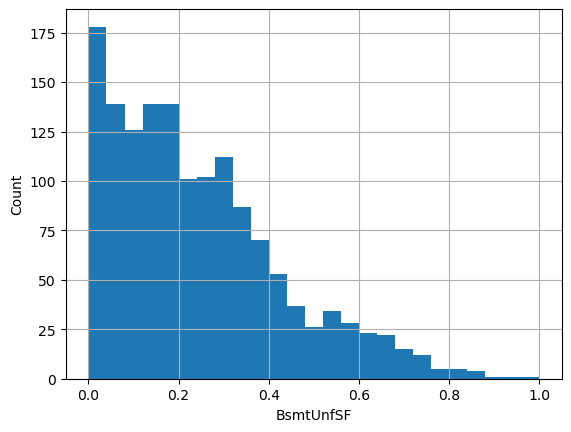

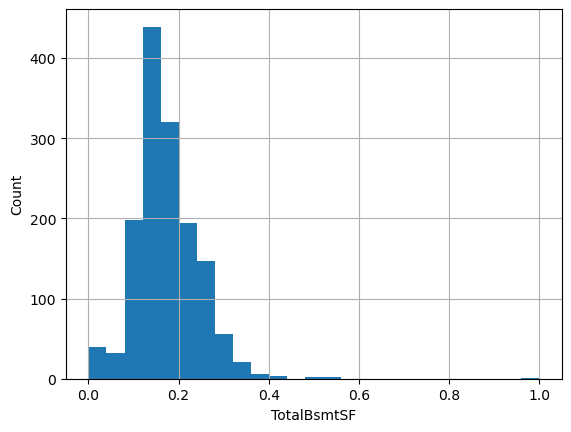

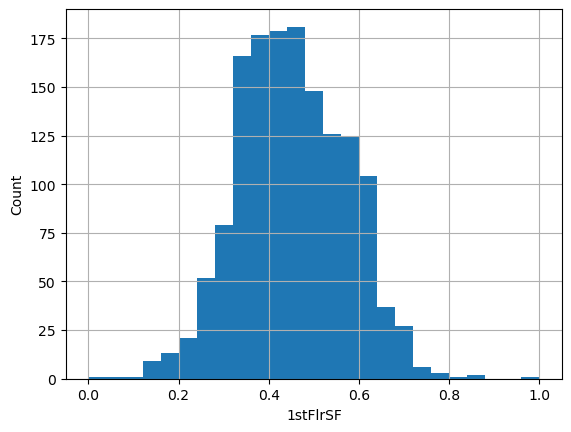

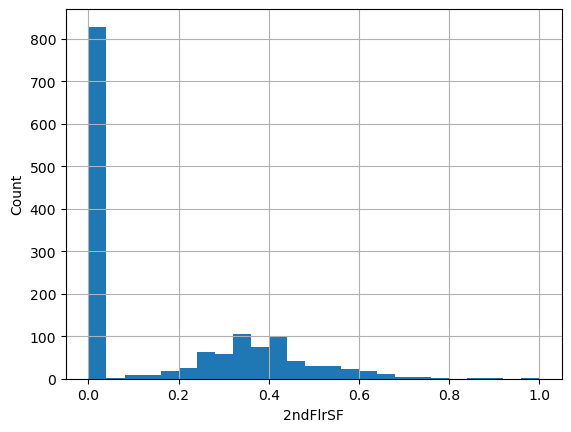

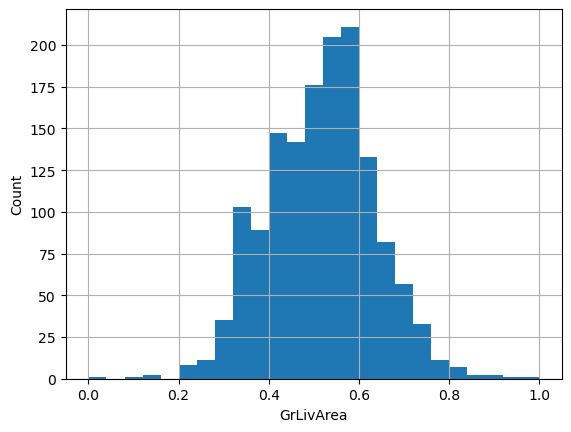

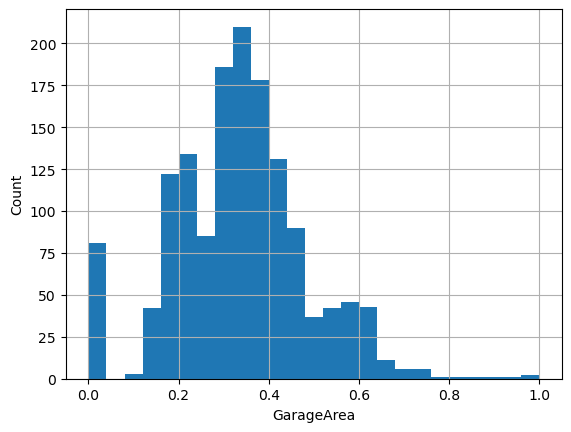

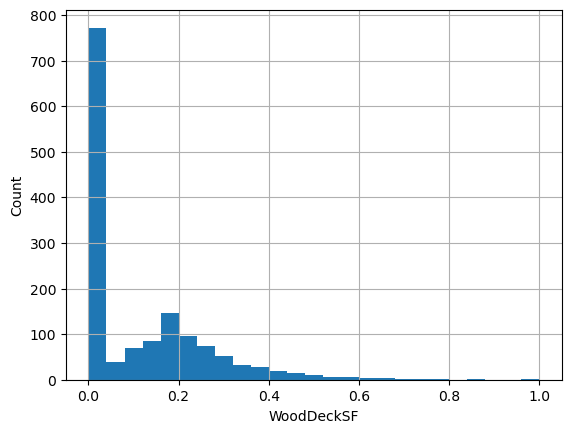

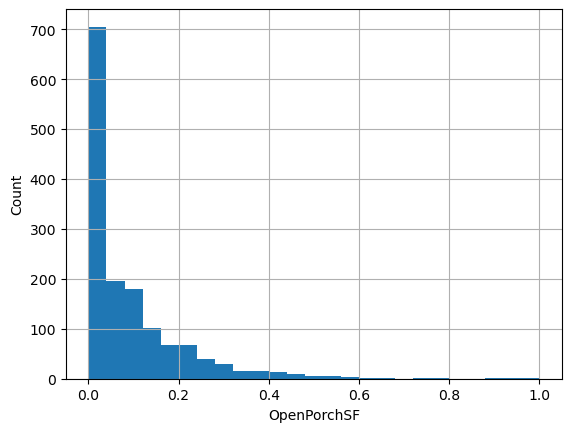

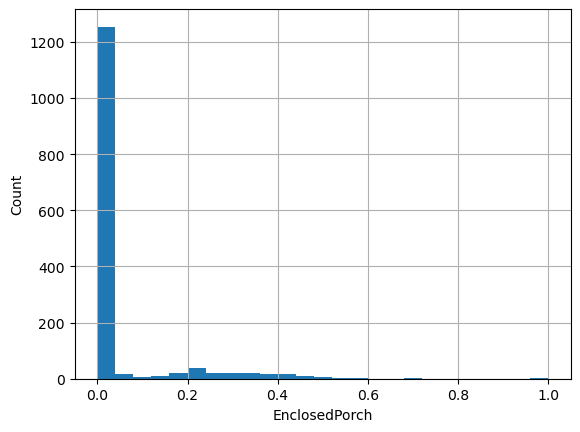

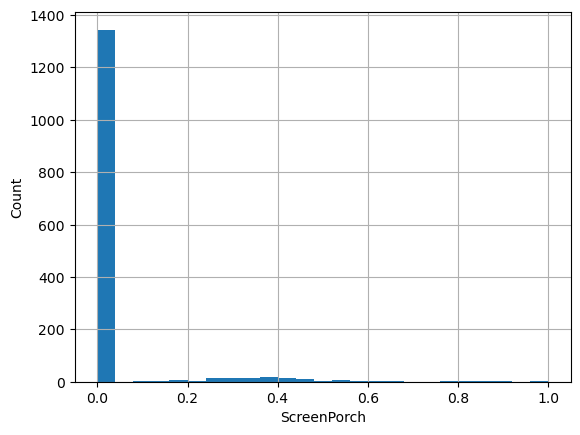

In [18]:
for feature in continuous_features:
    df_copy = train_df.copy()
    df_copy[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

It is clearly visible that the continuous features are skewed.


#### Visualising continuous features after performing logarithmic transformation


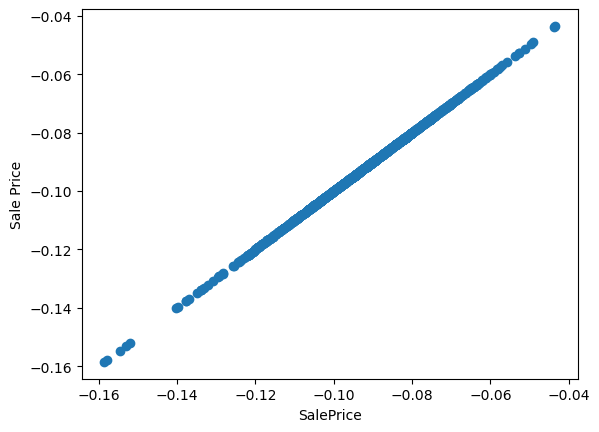

In [19]:
for feature in continuous_features:
    df_copy = train_df.copy()
    if 0 not in df_copy[feature].unique():
        df_copy[feature] = np.log(df_copy[feature])
        df_copy["SalePrice"] = np.log(df_copy["SalePrice"])
        plt.scatter(df_copy[feature], df_copy["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("Sale Price")
        plt.show()

After performing log transformation we can clearly see a monotonic relationship between the continuous features and Sale Price. This will give a positive correlation value.


### Outliers


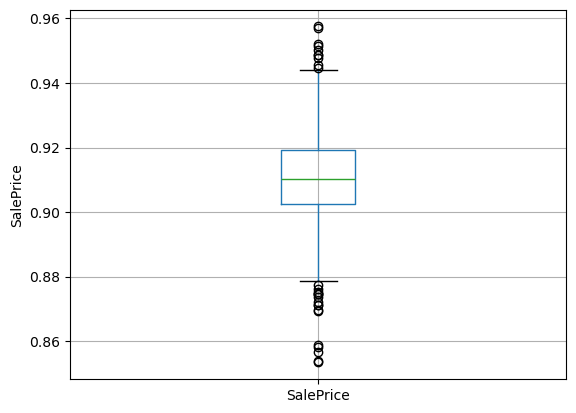

In [20]:
for feature in continuous_features:
    df_copy = train_df.copy()
    if 0 not in df_copy[feature].unique():
        df_copy[feature] = np.log(df_copy[feature])
        df_copy.boxplot(column=feature)
        plt.ylabel(feature)
        plt.show()

### Categorical Variables / Features


In [21]:
categorical_features = [col for col in train_df.columns if train_df[col].dtype == 'O']
print(f"Number of categorical variables/features: {len(categorical_features)}")

Number of categorical variables/features: 0


In [22]:
train_df[categorical_features].head()

""
0
1
2
3
4


In [23]:
for feature in categorical_features:
    print(f"Number of categories in {feature}: {len(train_df[feature].unique())}")

#### Relationship between categorical features and Sale Price


In [24]:
for feature in categorical_features:
    df_copy = train_df.copy()
    df_copy.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Median Sale Price")
    plt.show()

## FEATURE ENGINEERING


In [25]:
def null_features(dataset, features):
    return [feature for feature in features if dataset[feature].isnull().any()]

In [26]:
def display_missing_percentage(dataset, features):
    for null_feature in null_features(dataset, features):
        missing_percentage = dataset[null_feature].isnull().mean() * 100
        print(f"Percentage of missing values for {null_feature}: {missing_percentage}%")

### Handling Categorical Features


In [27]:
display_missing_percentage(train_df, categorical_features)

In [28]:
display_missing_percentage(test_df, categorical_features)

In [29]:
def replace_categorical_features(dataset):
    null_categorical_features = null_features(dataset, categorical_features)
    data = dataset.copy()
    data[null_categorical_features] = data[null_categorical_features].fillna("Missing")
    return data

In [30]:
train_df = replace_categorical_features(train_df)
train_df[null_features(train_df, categorical_features)].isnull().sum()

Series([], dtype: float64)

In [31]:
test_df = replace_categorical_features(test_df)
test_df[null_features(test_df, categorical_features)].isnull().sum()

Series([], dtype: float64)

### Handling Numerical Features


In [32]:
display_missing_percentage(train_df, numerical_features)

In [33]:
numerical_features = [col for col in test_df.columns if test_df[col].dtypes in [np.int64, np.float64]]
null_numerical_features = [feature for feature in numerical_features if test_df[feature].isnull().any()]
for null_feature in null_numerical_features:
    missing_percentage = test_df[null_feature].isnull().mean() * 100
    print(f"Percentage of missing values for {null_feature}: {missing_percentage}%")

In [34]:
def replace_numerical_features(dataset, features):
    data = dataset.copy()
    for feature in features:
        median = data[feature].median()
        data[feature + "_isnull"] = np.where(data[feature].isnull(), 1, 0)
        data[feature] = data[feature].fillna(median)
    return data

In [35]:
train_df = replace_numerical_features(train_df, null_features(train_df, numerical_features))
train_df[null_features(train_df, numerical_features)].isnull().sum()

Series([], dtype: float64)

In [36]:
train_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,2.505338,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.036765,0.098361,1.0,1.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,0.125089,1.0,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,1.0,0.0,0.0,0.0
1,2,2.493950,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,0.227941,0.524590,1.0,1.0,0.8,0.9,1.000000,0.00000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,0.173281,1.0,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,1.0,0.0,0.0,0.0
2,3,2.510994,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.051471,0.114754,1.0,1.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,0.086109,1.0,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,1.0,0.0,0.0,0.0
3,4,2.472277,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,0.669118,0.606557,1.0,1.0,0.7,0.4,1.000000,0.00000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,0.038271,1.0,0.0,0.231164,0.123732,1.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.5,0.0,0.0,0.0
4,5,2.520050,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,0.058824,0.147541,1.0,1.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,0.116052,1.0,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,1.0,0.0,0.0,0.0


In [37]:
test_df = replace_numerical_features(test_df, null_numerical_features)
test_df[null_numerical_features].isnull().sum()

Series([], dtype: float64)

In [38]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1461,0.000000,0.0,0.593445,0.566360,1.0,1.0,1.000000,1.000000,1.0,1.00,1.0,1.00,0.833333,1.0,1.00,1.0,0.444444,0.625,0.792373,0.584746,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.0,0.75,1.00,1.0,1.0,0.500000,0.116708,0.5,0.094364,0.126168,0.173111,1.0,0.75,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.00,0.166667,1.0,0.00,1.0,1.0,0.883333,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,1.0
1,1462,0.000000,1.0,0.598957,0.622527,1.0,1.0,0.666667,1.000000,1.0,0.75,1.0,1.00,1.000000,1.0,1.00,1.0,0.555556,0.625,0.779661,0.559322,0.5,1.0,0.7,0.727273,0.666667,0.083721,1.000000,1.0,0.75,1.00,1.0,1.0,0.666667,0.230175,1.0,0.000000,0.189720,0.260844,1.0,0.75,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.75,0.250000,1.0,0.00,1.0,1.0,0.876190,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,0.0,0.735294,0.454545,1.0,1.0,1.0,0.0,0.0,1.0
2,1463,0.235294,1.0,0.558854,0.614005,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.70,1.000000,1.0,1.00,0.8,0.444444,0.500,0.944915,0.898305,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.0,1.00,0.75,1.0,1.0,1.000000,0.197257,1.0,0.000000,0.064019,0.182139,1.0,0.50,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.00,0.250000,1.0,0.25,0.6,1.0,0.969048,0.333333,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,1.0,0.000000,0.181818,1.0,1.0,1.0,0.0,0.0,1.0
3,1464,0.235294,1.0,0.582212,0.524583,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.70,1.000000,1.0,1.00,0.8,0.555556,0.625,0.949153,0.898305,1.0,1.0,1.0,1.000000,0.666667,0.015504,1.000000,1.0,1.00,1.00,1.0,1.0,1.000000,0.150125,1.0,0.000000,0.151402,0.181747,1.0,1.00,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.75,0.333333,1.0,0.25,0.8,1.0,0.971429,0.333333,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,1.0
4,1465,0.588235,1.0,0.317987,0.335596,1.0,1.0,0.666667,0.666667,1.0,1.00,1.0,0.15,1.000000,1.0,0.75,1.0,0.777778,0.500,0.923729,0.847458,1.0,1.0,0.8,0.818182,1.000000,0.000000,0.666667,1.0,1.00,0.75,1.0,1.0,0.666667,0.065586,1.0,0.000000,0.475234,0.251227,1.0,1.00,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.75,0.166667,1.0,0.00,1.0,1.0,0.957143,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,1.00,1.0,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,1.0


### Handling Temporal Features


In [39]:
def replace_temporal_features(dataset, features):
    data = dataset.copy()
    for feature in features:
        if feature != "YrSold":
            data[feature] = data["YrSold"] - data[feature]
    return data

In [40]:
train_df = replace_temporal_features(train_df, temporal_features)

In [41]:
train_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,2.505338,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.463235,0.401639,1.0,1.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,0.125089,1.0,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.453271,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,1.0,0.0,0.0,0.50
1,2,2.493950,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,0.022059,-0.274590,1.0,1.0,0.8,0.9,1.000000,0.00000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,0.173281,1.0,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,-0.039720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,1.0,0.0,0.0,0.25
2,3,2.510994,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.448529,0.385246,1.0,1.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,0.086109,1.0,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.434579,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,1.0,0.0,0.0,0.50
3,4,2.472277,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,-0.669118,-0.606557,1.0,1.0,0.7,0.4,1.000000,0.00000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,0.038271,1.0,0.0,0.231164,0.123732,1.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,-0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.5,0.0,0.0,0.00
4,5,2.520050,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,0.441176,0.352459,1.0,1.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,0.116052,1.0,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.425234,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,1.0,0.0,0.0,0.50


In [42]:
test_df = replace_temporal_features(test_df, temporal_features)

In [43]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1461,0.000000,0.0,0.593445,0.566360,1.0,1.0,1.000000,1.000000,1.0,1.00,1.0,1.00,0.833333,1.0,1.00,1.0,0.444444,0.625,0.207627,0.415254,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.0,0.75,1.00,1.0,1.0,0.500000,0.116708,0.5,0.094364,0.126168,0.173111,1.0,0.75,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.00,0.166667,1.0,0.00,1.0,1.0,0.116667,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,0.0
1,1462,0.000000,1.0,0.598957,0.622527,1.0,1.0,0.666667,1.000000,1.0,0.75,1.0,1.00,1.000000,1.0,1.00,1.0,0.555556,0.625,0.220339,0.440678,0.5,1.0,0.7,0.727273,0.666667,0.083721,1.000000,1.0,0.75,1.00,1.0,1.0,0.666667,0.230175,1.0,0.000000,0.189720,0.260844,1.0,0.75,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.75,0.250000,1.0,0.00,1.0,1.0,0.123810,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,0.0,0.735294,0.454545,1.0,1.0,1.0,0.0,0.0,0.0
2,1463,0.235294,1.0,0.558854,0.614005,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.70,1.000000,1.0,1.00,0.8,0.444444,0.500,0.055085,0.101695,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.0,1.00,0.75,1.0,1.0,1.000000,0.197257,1.0,0.000000,0.064019,0.182139,1.0,0.50,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.00,0.250000,1.0,0.25,0.6,1.0,0.030952,0.333333,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,1.0,0.000000,0.181818,1.0,1.0,1.0,0.0,0.0,0.0
3,1464,0.235294,1.0,0.582212,0.524583,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.70,1.000000,1.0,1.00,0.8,0.555556,0.625,0.050847,0.101695,1.0,1.0,1.0,1.000000,0.666667,0.015504,1.000000,1.0,1.00,1.00,1.0,1.0,1.000000,0.150125,1.0,0.000000,0.151402,0.181747,1.0,1.00,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.75,0.333333,1.0,0.25,0.8,1.0,0.028571,0.333333,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,0.0
4,1465,0.588235,1.0,0.317987,0.335596,1.0,1.0,0.666667,0.666667,1.0,1.00,1.0,0.15,1.000000,1.0,0.75,1.0,0.777778,0.500,0.076271,0.152542,1.0,1.0,0.8,0.818182,1.000000,0.000000,0.666667,1.0,1.00,0.75,1.0,1.0,0.666667,0.065586,1.0,0.000000,0.475234,0.251227,1.0,1.00,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.75,0.166667,1.0,0.00,1.0,1.0,0.042857,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,1.00,1.0,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0


### Performing Logarithmic Transformations on Continuous Features


In [44]:
train_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,2.505338,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.463235,0.401639,1.0,1.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,0.125089,1.0,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.453271,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,1.0,0.0,0.0,0.50
1,2,2.493950,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,0.022059,-0.274590,1.0,1.0,0.8,0.9,1.000000,0.00000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,0.173281,1.0,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,-0.039720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,1.0,0.0,0.0,0.25
2,3,2.510994,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.448529,0.385246,1.0,1.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,0.086109,1.0,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.434579,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,1.0,0.0,0.0,0.50
3,4,2.472277,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,-0.669118,-0.606557,1.0,1.0,0.7,0.4,1.000000,0.00000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,0.038271,1.0,0.0,0.231164,0.123732,1.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,-0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.5,0.0,0.0,0.00
4,5,2.520050,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,0.441176,0.352459,1.0,1.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,0.116052,1.0,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.425234,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,1.0,0.0,0.0,0.50


In [45]:
nonzero_continuous_features = [feature for feature in continuous_features if 0 not in train_df[feature].unique()]
for feature in nonzero_continuous_features:
    train_df[feature] = np.log(train_df[feature])
for feature in nonzero_continuous_features:
    if feature != "SalePrice":
        test_df[feature] = np.log(test_df[feature])

In [46]:
train_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,0.918424,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.463235,0.401639,1.0,1.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,0.125089,1.0,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.453271,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,1.0,0.0,0.0,0.50
1,2,0.913868,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,0.022059,-0.274590,1.0,1.0,0.8,0.9,1.000000,0.00000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,0.173281,1.0,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,-0.039720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,1.0,0.0,0.0,0.25
2,3,0.920679,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.448529,0.385246,1.0,1.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,0.086109,1.0,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.434579,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,1.0,0.0,0.0,0.50
3,4,0.905140,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,-0.669118,-0.606557,1.0,1.0,0.7,0.4,1.000000,0.00000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,0.038271,1.0,0.0,0.231164,0.123732,1.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,-0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.5,0.0,0.0,0.00
4,5,0.924279,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,0.441176,0.352459,1.0,1.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,0.116052,1.0,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.425234,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,1.0,0.0,0.0,0.50


### Handling Rare Categorical Features


In [47]:
def handle_rare_categorical_features(dataset, features, threshold):
    data = dataset.copy()
    for feature in features:
        counts = data[feature].value_counts(normalize=True)
        rare_categories = counts[counts > threshold].index
        data[feature] = np.where(data[feature].isin(rare_categories), data[feature], "Rare")
    return data

In [48]:
train_df = handle_rare_categorical_features(train_df, categorical_features, 0.01)
train_df["Utilities"].value_counts()

Utilities
1.0    1459
0.0       1
Name: count, dtype: int64

In [49]:
test_df = handle_rare_categorical_features(test_df, categorical_features, 0.01)
test_df["Utilities"].value_counts()

Utilities
1.0    1457
0.0       2
Name: count, dtype: int64

In [50]:
def encode_categorical_features(dataset, features):
    data = dataset.copy()
    for feature in features:
        labels_ordered = data[feature].value_counts(normalize=True).sort_values().index
        labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
        data[feature] = data[feature].map(labels_ordered)
    return data

In [51]:
train_df = encode_categorical_features(train_df, categorical_features)

In [52]:
train_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,0.918424,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.463235,0.401639,1.0,1.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,0.125089,1.0,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.453271,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,1.0,0.0,0.0,0.50
1,2,0.913868,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,0.022059,-0.274590,1.0,1.0,0.8,0.9,1.000000,0.00000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,0.173281,1.0,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,-0.039720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,1.0,0.0,0.0,0.25
2,3,0.920679,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.448529,0.385246,1.0,1.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,0.086109,1.0,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.434579,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,1.0,0.0,0.0,0.50
3,4,0.905140,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,-0.669118,-0.606557,1.0,1.0,0.7,0.4,1.000000,0.00000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,0.038271,1.0,0.0,0.231164,0.123732,1.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,-0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.5,0.0,0.0,0.00
4,5,0.924279,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,0.441176,0.352459,1.0,1.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,0.116052,1.0,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.425234,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,1.0,0.0,0.0,0.50


In [53]:
test_df = encode_categorical_features(test_df, categorical_features)

## Feature Scaling


In [54]:
feature_scale = [feature for feature in train_df.columns if feature not in ["Id", "SalePrice"]]
scaler = MinMaxScaler()

In [55]:
scaler.fit(train_df[feature_scale])
train_data = pd.concat([train_df[["Id", "SalePrice"]].reset_index(drop=True), pd.DataFrame(scaler.transform(train_df[feature_scale]), columns=feature_scale)], axis=1)
train_data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,0.918424,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.721374,0.696581,1.0,1.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,0.125089,1.0,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.711823,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,1.0,0.0,0.0,0.750
1,2,0.913868,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,0.492366,0.344017,1.0,1.0,0.8,0.9,1.000000,0.00000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,0.173281,1.0,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,0.451970,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,1.0,0.0,0.0,0.625
2,3,0.920679,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.713740,0.688034,1.0,1.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,0.086109,1.0,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.701970,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,1.0,0.0,0.0,0.750
3,4,0.905140,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,0.133588,0.170940,1.0,1.0,0.7,0.4,1.000000,0.00000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,0.038271,1.0,0.0,0.231164,0.123732,1.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,0.433498,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.5,0.0,0.0,0.500
4,5,0.924279,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,0.709924,0.670940,1.0,1.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,0.116052,1.0,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.697044,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,1.0,0.0,0.0,0.750


In [56]:
train_data.to_csv("X_train.csv", index=False)

In [57]:
scaler.fit(test_df[feature_scale])
test_data = pd.concat([test_df[["Id"]].reset_index(drop=True), pd.DataFrame(scaler.transform(test_df[feature_scale]), columns=feature_scale)], axis=1)
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1461,0.000000,0.0,0.593445,0.566360,1.0,1.0,1.000000,1.000000,1.0,1.00,1.0,1.00,0.833333,1.0,1.00,1.0,0.444444,0.625,0.685841,0.905172,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.0,0.75,1.00,1.0,1.0,0.500000,0.116708,0.5,0.094364,0.126168,0.173111,1.0,0.75,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.00,0.166667,1.0,0.00,1.0,1.0,0.834816,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,0.5
1,1462,0.000000,1.0,0.598957,0.622527,1.0,1.0,0.666667,1.000000,1.0,0.75,1.0,1.00,1.000000,1.0,1.00,1.0,0.555556,0.625,0.699115,0.931034,0.5,1.0,0.7,0.727273,0.666667,0.083721,1.000000,1.0,0.75,1.00,1.0,1.0,0.666667,0.230175,1.0,0.000000,0.189720,0.260844,1.0,0.75,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.75,0.250000,1.0,0.00,1.0,1.0,0.842440,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,0.0,0.735294,0.454545,1.0,1.0,1.0,0.0,0.0,0.5
2,1463,0.235294,1.0,0.558854,0.614005,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.70,1.000000,1.0,1.00,0.8,0.444444,0.500,0.526549,0.586207,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,1.0,1.00,0.75,1.0,1.0,1.000000,0.197257,1.0,0.000000,0.064019,0.182139,1.0,0.50,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.00,0.250000,1.0,0.25,0.6,1.0,0.743329,0.333333,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,1.0,0.000000,0.181818,1.0,1.0,1.0,0.0,0.0,0.5
3,1464,0.235294,1.0,0.582212,0.524583,1.0,1.0,0.666667,1.000000,1.0,1.00,1.0,0.70,1.000000,1.0,1.00,0.8,0.555556,0.625,0.522124,0.586207,1.0,1.0,1.0,1.000000,0.666667,0.015504,1.000000,1.0,1.00,1.00,1.0,1.0,1.000000,0.150125,1.0,0.000000,0.151402,0.181747,1.0,1.00,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.75,0.333333,1.0,0.25,0.8,1.0,0.740788,0.333333,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,1.00,1.0,0.000000,0.454545,1.0,1.0,1.0,0.0,0.0,0.5
4,1465,0.588235,1.0,0.317987,0.335596,1.0,1.0,0.666667,0.666667,1.0,1.00,1.0,0.15,1.000000,1.0,0.75,1.0,0.777778,0.500,0.548673,0.637931,1.0,1.0,0.8,0.818182,1.000000,0.000000,0.666667,1.0,1.00,0.75,1.0,1.0,0.666667,0.065586,1.0,0.000000,0.475234,0.251227,1.0,1.00,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.75,0.166667,1.0,0.00,1.0,1.0,0.756036,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,1.00,1.0,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.5


In [58]:
test_data.to_csv("X_test.csv", index=False)

## FEATURE SELECTION


In [59]:
train_df = pd.read_csv("X_train.csv")
test_df = pd.read_csv("X_test.csv")

In [60]:
train_df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_isnull,MasVnrArea_isnull,GarageYrBlt_isnull
0,1,0.918424,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.721374,0.696581,1.0,1.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,1.00,1.00,0.833333,0.125089,1.0,0.0,0.064212,0.140098,1.0,1.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,1.0,1.0,0.711823,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,1.0,0.0,0.0,0.750
1,2,0.913868,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,1.0,0.25,1.0,0.136364,0.8,1.0,1.0,1.0,0.555556,0.875,0.492366,0.344017,1.0,1.0,0.8,0.9,1.000000,0.00000,1.000000,1.0,0.75,0.75,1.00,0.50,0.666667,0.173281,1.0,0.0,0.121575,0.206547,1.0,1.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.6,1.0,0.451970,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,1.0,0.0,0.0,0.625
2,3,0.920679,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.666667,1.0,1.0,1.00,1.0,0.954545,1.0,1.0,1.0,0.8,0.666667,0.500,0.713740,0.688034,1.0,1.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,1.00,0.25,0.833333,0.086109,1.0,0.0,0.185788,0.150573,1.0,1.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,1.0,0.701970,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,1.0,0.0,0.0,0.750
3,4,0.905140,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.666667,1.0,1.0,0.75,1.0,0.500000,1.0,1.0,1.0,0.8,0.666667,0.500,0.133588,0.170940,1.0,1.0,0.7,0.4,1.000000,0.00000,1.000000,1.0,0.50,1.00,0.75,1.00,0.666667,0.038271,1.0,0.0,0.231164,0.123732,1.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.8,0.433498,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.5,0.0,0.0,0.500
4,5,0.924279,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.666667,1.0,1.0,0.25,1.0,0.409091,1.0,1.0,1.0,0.8,0.777778,0.500,0.709924,0.670940,1.0,1.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,1.00,0.75,0.833333,0.116052,1.0,0.0,0.209760,0.187398,1.0,1.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,1.0,0.697044,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,1.0,0.0,0.0,0.750


In [61]:
y_train = train_df[["SalePrice"]]
X_train = train_df.drop(["Id", "SalePrice"], axis=1)

X_test = test_df.drop(["Id"], axis=1)

In [62]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [63]:
selected_features = X_train.columns[(feature_sel_model.get_support())]
print(f"Total number of features: {X_train.shape[1]}")
print(f"Number of selected features: {len(selected_features)}")
print(f"Features with coefficients shrank to zero: {np.sum(feature_sel_model.estimator_.coef_ == 0)}")

Total number of features: 82
Number of selected features: 0
Features with coefficients shrank to zero: 82


In [64]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [65]:
X_train.head()

""
0
1
2
3
4


In [66]:
X_test.head()

""
0
1
2
3
4


## Training a Linear Regression Model


In [67]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: at least one array or dtype is required

In [ ]:
regressor.predict(X_test)

array([[2.47561877],
       [2.47703987],
       [2.45809191],
       ...,
       [2.48651385],
       [2.48840865],
       [2.48746125]])

In [ ]:
y_test = pd.DataFrame(regressor.predict(X_test), columns=["SalePrice"])

In [ ]:
regressor.score(X_test, y_test)

1.0